# Learning to work with the data

Import relevant packages

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from plotting_functions_BES import *
from functions_BES import *
import matplotlib.path as mplPath

Read $D_\alpha$ and density data

In [2]:
# for density, Dalpha and upper tangential Dalpha
dalpha_from_file = xr.open_dataarray('Data/shot29378_dalpha.nc')

dalpha_time = np.asarray(dalpha_from_file.coords['time'])
dalpha_data = np.asarray(dalpha_from_file)

density_from_file = xr.open_dataarray('Data/shot29378_density.nc')

density_time = np.asarray(density_from_file.coords['time'])
density_data = np.asarray(density_from_file)

Read equilibria data

In [3]:
# for equilibria
equilib_from_file = xr.open_dataarray('Data/shot29378_equilibria.nc')

equilib_time = np.asarray(equilib_from_file.coords['time'])
equilib_R = np.asarray(equilib_from_file.coords['R'])
equilib_Z = np.asarray(equilib_from_file.coords['Z'])
equilib_psi = np.asarray(equilib_from_file) # Contains 135 length-65 arrays [0:134][0:64]

Read BES data

In [4]:
# for BES data
# (R, z) locations for the BES channels (view location)
apdpos = np.asarray(xr.open_dataarray('Data/shot29378_apdpos.nc'))

fluct_data_from_file = xr.open_dataarray('Data/shot29378_LH_fluct_data.nc')

bes_time = np.asarray(fluct_data_from_file.coords['time'])
fluct_data = np.asarray(fluct_data_from_file)
# fluct_data has 4 rows, 8 channels (mapped to apdpos)

Contour plot of flux surfaces from equilibrium data

In [5]:
time_idx = 50 # 0 to 132
"""plt.contour(equilib_R, equilib_Z, equilib_psi[time_idx], np.linspace(0, 1, 21))
plt.title("Time = " + str(equilib_time[time_idx]))
plt.xlabel("$R$ / m")
plt.ylabel("$Z$ / m")
plt.colorbar()
plt.show()"""

'plt.contour(equilib_R, equilib_Z, equilib_psi[time_idx], np.linspace(0, 1, 21))\nplt.title("Time = " + str(equilib_time[time_idx]))\nplt.xlabel("$R$ / m")\nplt.ylabel("$Z$ / m")\nplt.colorbar()\nplt.show()'

Generate plot of fluctation against time for a given BES channel from fluctuation data

In [6]:
channel_id = 5 # 0 to 31
channel_coords = apdpos[channel_id] # Get corresponding (R,Z) coordinates

#plot_bes_fluctuations(29378, bes_time, fluct_data, [0.36,0.54], [0,1], "fluct_plot")

Generate grid of channels and fluctuation value at a given time

In [7]:
"""time_idx=992499 # 0 to 992499
channels = [] # 32x1 array of the 32 channels
for channel in fluct_data:
    channels.append(channel[time_idx])
channels = np.reshape(channels, (4,8)) # Convert 32x1 array to 8x4, presumed to be correct
plt.matshow(channels)
plt.title("Time =" + str(bes_time[time_idx]))
plt.xlabel("Channel")
plt.ylabel("Channel")
plt.colorbar()"""

'time_idx=992499 # 0 to 992499\nchannels = [] # 32x1 array of the 32 channels\nfor channel in fluct_data:\n    channels.append(channel[time_idx])\nchannels = np.reshape(channels, (4,8)) # Convert 32x1 array to 8x4, presumed to be correct\nplt.matshow(channels)\nplt.title("Time =" + str(bes_time[time_idx]))\nplt.xlabel("Channel")\nplt.ylabel("Channel")\nplt.colorbar()'

In [8]:
#plot_bes_locs(29378, apdpos, equilib_time[50], equilib_R, equilib_Z, equilib_psi[50])

Plotting $D_\alpha$ data (density) to identify timeslices of interest where there appears to be repetitive behaviour.

In [9]:
"""figure, axes = plt.subplots(2, 1, sharex=True, 
                                figsize=(15, 6))
axes[0].plot(dalpha_time, dalpha_data, 'k', linewidth=0.8)
axes[1].plot(density_time, density_data, 'k', linewidth=0.8)
axes[1].tick_params(axis='x', labelsize=24)
axes[1].set_xlabel('time [s]', fontsize=26)
axes[1].set_xlim([dalpha_time[0], dalpha_time[-1]])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
plt.close()"""

"figure, axes = plt.subplots(2, 1, sharex=True, \n                                figsize=(15, 6))\naxes[0].plot(dalpha_time, dalpha_data, 'k', linewidth=0.8)\naxes[1].plot(density_time, density_data, 'k', linewidth=0.8)\naxes[1].tick_params(axis='x', labelsize=24)\naxes[1].set_xlabel('time [s]', fontsize=26)\naxes[1].set_xlim([dalpha_time[0], dalpha_time[-1]])\nplt.subplots_adjust(wspace=0, hspace=0)\nplt.show()\nplt.close()"

In [10]:
"""plot_dalpha(29378, dalpha_time, dalpha_data, [0.16,0.24], "region_1")
plot_density(29378, density_time, density_data, [0.16,0.24], "region_1")

plot_dalpha(29378, dalpha_time, dalpha_data, [0.36,0.54], "region_2")
plot_density(29378, density_time, density_data, [0.36,0.54], "region_2")

plot_dalpha(29378, dalpha_time, dalpha_data, [0.54,0.68], "region_3")
plot_density(29378, density_time, density_data, [0.54,0.68], "region_3")"""

'plot_dalpha(29378, dalpha_time, dalpha_data, [0.16,0.24], "region_1")\nplot_density(29378, density_time, density_data, [0.16,0.24], "region_1")\n\nplot_dalpha(29378, dalpha_time, dalpha_data, [0.36,0.54], "region_2")\nplot_density(29378, density_time, density_data, [0.36,0.54], "region_2")\n\nplot_dalpha(29378, dalpha_time, dalpha_data, [0.54,0.68], "region_3")\nplot_density(29378, density_time, density_data, [0.54,0.68], "region_3")'

How uniformly spaces is <code>bes_time</code>?

In [11]:
time_diffs = np.diff(bes_time)
print("Mean =", np.mean(time_diffs), "s\nStandard Deviation =", np.std(time_diffs), "s")

Mean = 4.99999999992207e-07 s
Standard Deviation = 2.42898975271345e-17 s


The step appears to be highly uniform so the FFT provided by <code>scipy</code> is reasonable to use.

Plot full $D_\alpha$ data, highlighting the regions of interest and storing their data in arrays

In [12]:
regions = [[0.16,0.24], [0.36,0.54], [0.54,0.68]]
region_data = []
region_times = []

for i in range(3):
    idx1 = (np.abs(dalpha_time - regions[i][0])).argmin()
    idx2 = (np.abs(dalpha_time - regions[i][1])).argmin()
    region_data.append(dalpha_data[idx1:idx2+1]) # +1 to include end
    region_times.append(dalpha_time[idx1:idx2+1])

"""plt.plot(dalpha_time, dalpha_data, 'k', linewidth=0.5)
plt.plot(region_times[0], region_data[0], "r", linewidth=0.5)
plt.plot(region_times[1], region_data[1], "g", linewidth=0.5)
plt.plot(region_times[2], region_data[2], "b", linewidth=0.5)

plt.xlabel("Time [s]")
plt.ylabel(r"Density [m$^{-3}$]")
#plt.savefig("Plots/Full_Dalpha_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()"""

'plt.plot(dalpha_time, dalpha_data, \'k\', linewidth=0.5)\nplt.plot(region_times[0], region_data[0], "r", linewidth=0.5)\nplt.plot(region_times[1], region_data[1], "g", linewidth=0.5)\nplt.plot(region_times[2], region_data[2], "b", linewidth=0.5)\n\nplt.xlabel("Time [s]")\nplt.ylabel(r"Density [m$^{-3}$]")\n#plt.savefig("Plots/Full_Dalpha_plot.pdf", format="pdf", bbox_inches="tight")\nplt.show()'

Plot $D_\alpha$ data for each region of interest.

In [13]:
"""figure, axes = plt.subplots(3, 1, sharex=False, figsize=(15, 9))

for i in range(3):
    idx1 = (np.abs(dalpha_time - regions[i][0])).argmin()
    idx2 = (np.abs(dalpha_time - regions[i][1])).argmin()
    axes[i].plot(dalpha_time[idx1:idx2], dalpha_data[idx1:idx2], 'k', linewidth=0.8)
    axes[i].tick_params(axis='x', labelsize=24)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].set_ylabel(r"Region " + str(i+1) + "\nDensity [m$^{-3}$]", fontsize=20)
    axes[i].locator_params(axis='y', nbins=3)    

axes[-1].set_xlabel('Time [s]', fontsize=26)
plt.subplots_adjust(hspace=0.5)
#plt.savefig("Plots/Dalpha_region_plots.pdf", format="pdf", bbox_inches="tight")
plt.show()"""

'figure, axes = plt.subplots(3, 1, sharex=False, figsize=(15, 9))\n\nfor i in range(3):\n    idx1 = (np.abs(dalpha_time - regions[i][0])).argmin()\n    idx2 = (np.abs(dalpha_time - regions[i][1])).argmin()\n    axes[i].plot(dalpha_time[idx1:idx2], dalpha_data[idx1:idx2], \'k\', linewidth=0.8)\n    axes[i].tick_params(axis=\'x\', labelsize=24)\n    axes[i].tick_params(axis=\'y\', labelsize=20)\n    axes[i].set_ylabel(r"Region " + str(i+1) + "\nDensity [m$^{-3}$]", fontsize=20)\n    axes[i].locator_params(axis=\'y\', nbins=3)    \n\naxes[-1].set_xlabel(\'Time [s]\', fontsize=26)\nplt.subplots_adjust(hspace=0.5)\n#plt.savefig("Plots/Dalpha_region_plots.pdf", format="pdf", bbox_inches="tight")\nplt.show()'

Function to determine if a given point lies inside the separatrix. Not visually tested on all extreme cases but seems to work. The warning 'UserWarning: No contour levels were found within the data range.' - this just means the contour is too far to the left at that time. A problem in some special cases e.g. at end of region 3. Over the times that will be useful for analysis there should be a contour in the vicinity so this warning shouldn't occur.

In [14]:
def inside_sep(equilib_R, equilib_Z, equilib_psi_t, apdpos):
    contains = []
    
    # Only looking for points in the relevant z and right of array's left-most point
    # Add on bits to extend contour far enough
    zmin = np.abs(np.min(apdpos[:,1])-equilib_Z-0.1).argmin()
    zmax = np.abs(np.max(apdpos[:,1])-equilib_Z+0.1).argmin()
    rmin = np.abs(np.min(apdpos[:,0])-equilib_R-0.1).argmin()
    
    # Get path of separatrix
    CS = plt.contour(equilib_R[rmin:], equilib_Z[zmin:zmax], equilib_psi_t[zmin:zmax,rmin:], [1.0])
    plt.close()
    path = mplPath.Path(CS.allsegs[0][0])
    
    # Extrapolate to get more coordinates
    verts = path.vertices
    verts_expanded = []
    idx = 0
    for i in verts[:-1]:
        for r in np.linspace(verts[idx,0],verts[idx+1,0],100): # Get lots of points
            verts_expanded.append([r, np.interp(r, verts[idx:idx+2,0], verts[idx:idx+2,1])])
        idx += 1
    verts_expanded = np.asarray(verts_expanded)
    
    # Find r-coord of point closest in z to channel and test if it's further out
    for ch in apdpos:
        closest_r = verts_expanded[np.abs(verts_expanded[:,1]-ch[1]).argmin(),0]
        if closest_r > ch[0]:
            contains.append(True)
            #plt.scatter(ch[0], ch[1], color="g")
        else:
            contains.append(False)
            #plt.scatter(ch[0], ch[1], color="r")
            
    return np.asarray(contains)

In [15]:
#inside_sep(equilib_R, equilib_Z, equilib_psi[116], apdpos)

We want a to be able to find out which columns are always inside separatrix for each region, and how much of each row is always inside it.

In [16]:
region_times_equilib = []
for region in regions:
    idx1 = (np.abs(equilib_time - region[0])).argmin()
    idx2 = (np.abs(equilib_time - region[1])).argmin()
    region_times_equilib.append(np.arange(idx1,idx2+1,1)) # Need +1 to include end point
region_times_equilib[2] = region_times_equilib[2][:-1] # Handle special case

Function to determine which channels are always within separatrix for a given region. A refined version could be something like where is True the case most of the time. Avoid excluding a column because of contour at one point in time.

In [17]:
def inside_sep_all_time(region):
    region = region -1
    all_time = [True for i in range(32)]
    for time in region_times_equilib[region]:
        this_time = inside_sep(equilib_R, equilib_Z, equilib_psi[time], apdpos)
        for ch in range(32):
            if this_time[ch] == False:
                all_time[ch] = False
    all_time = np.asarray(all_time)
    return all_time

In [18]:
#for region in range(1,4):
#    print(inside_sep_all_time(region).reshape(4,8), end="\n\n")

Function to say whether or not a given column is always inside separatrix for a given region.

In [19]:
def check_col_good(region, col): # region and col start from 1
    all_time = inside_sep_all_time(region)
    region = region-1
    col = col-1
    
    this_col = [all_time[ch] for ch in np.arange(col,32,8)]
    if False not in this_col:
        return True
    else:
        return False

In [20]:
"""for region in range(1,4):
    for col in range(1,9):
        print(check_col_good(region,col))"""

'for region in range(1,4):\n    for col in range(1,9):\n        print(check_col_good(region,col))'

This says first 2 cols are good for regions 1 & 2, and first 3 cols for region 3. Will include some cols where channel is juuuust inside.

Function to say how much of a row is always inside separatrix for a given region.

In [21]:
def check_row_lim(region, row): # region and col start from 1
    all_time = inside_sep_all_time(region)
    region = region-1
    row = row-1
    
    chans = [ch for ch in range(8*row,8*row+8)]
    this_row = [all_time[ch] for ch in chans]
    if False in this_row:
        return this_row.index(False)-1 # Return one before False, i.e. the last True
    else:
        return chans[-1] # All channels always inside. Return index of the end

In [22]:
"""for region in range(1,4):
    for row in range(1,5):
        print("Region", region, ", row", row, check_row_lim(region,row))
    print("")"""

'for region in range(1,4):\n    for row in range(1,5):\n        print("Region", region, ", row", row, check_row_lim(region,row))\n    print("")'

This says: for region 1, the first 2 channels of each row are always inside. For region 2 it's the same, but rows 1&2 have 3 inside. For region 3, all have first 3 with rows 1&2 also having another, for 4 total.

In [23]:
#plot_bes_fluct_spectrogram(29378, bes_time, fluct_data, [i for i in range(32)], [bes_time[0], bes_time[-1]], 8, "full", threshold=0.54)

Might a bandpass filter be useful?

In [24]:
def fft_channel( # A. Caplan, this isn't new, just a modified get_channel_fft()
        bes_time, fluct_data, timeslice):
    idx1 = (np.abs(bes_time - timeslice[0])).argmin()
    idx2 = (np.abs(bes_time - timeslice[1])).argmin()
    
    ps_bes = np.fft.fft(fluct_data[idx1:idx2])
    time_step_bes = bes_time[idx1+1] - bes_time[idx1]
    freqs_bes = np.fft.fftfreq(fluct_data[idx1:idx2].size, 
                               time_step_bes)
    idx_bes = np.argsort(freqs_bes)
    
    return [(1.0e-3*freqs_bes[idx_bes]), (ps_bes[idx_bes])] # Note conversion to kHz

In [25]:
"""plt.plot(bes_time, fluct_data[0])
filt = butter_bandpass_filter(fluct_data[0], (0.5 * f_samp)/100, 250.0e3, f_samp)

trans_norm = fft_channel(bes_time, fluct_data[0], [bes_time[0], bes_time[-1]])
trans_filt = fft_channel(bes_time, filt, [bes_time[0], bes_time[-1]])

plt.plot(trans_norm[0], np.log(np.abs(trans_norm[1])**2), linewidth=0.1)
#plt.xlim(left=-500, right=500)
plt.show()

plt.plot(trans_filt[0], np.log(np.abs(trans_filt[1])**2), linewidth=0.1)
#plt.xlim(left=-500, right=500)
plt.show()

plt.close()"""

'plt.plot(bes_time, fluct_data[0])\nfilt = butter_bandpass_filter(fluct_data[0], (0.5 * f_samp)/100, 250.0e3, f_samp)\n\ntrans_norm = fft_channel(bes_time, fluct_data[0], [bes_time[0], bes_time[-1]])\ntrans_filt = fft_channel(bes_time, filt, [bes_time[0], bes_time[-1]])\n\nplt.plot(trans_norm[0], np.log(np.abs(trans_norm[1])**2), linewidth=0.1)\n#plt.xlim(left=-500, right=500)\nplt.show()\n\nplt.plot(trans_filt[0], np.log(np.abs(trans_filt[1])**2), linewidth=0.1)\n#plt.xlim(left=-500, right=500)\nplt.show()\n\nplt.close()'

Make plots of short-time FFT for each region.

In [26]:
#for i in range(3):
#    plot_bes_fluct_spectrogram(29378, bes_time, fluct_data, [i for i in range(32)], [regions[i][0],regions[i][1]], 8, "reg_" + str(i+1))

Function to compute how far on average a BES column is in the SOL over a given timeslice. Negative means inside separatrix.

In [27]:
def sol_dist(equilib_time, equilib_R, equilib_Z, equilib_psi, timeslice, col, apdpos):   
    # Only looking for points in the relevant z and right of array's left-most point
    # Add on bits to ensure the contour extends far enough
    zmin = np.abs(np.min(apdpos[:,1])-equilib_Z-0.1).argmin()
    zmax = np.abs(np.max(apdpos[:,1])-equilib_Z+0.1).argmin()
    rmin = np.abs(np.min(apdpos[:,0])-equilib_R-0.1).argmin()
    
    # Convert timeslice to indices of equilib_time
    if isinstance(timeslice, list) or isinstance(timeslice, np.ndarray):
        idx1 = np.abs(equilib_time-timeslice[0]).argmin()
        idx2 = np.abs(equilib_time-timeslice[1]).argmin()
    else:
        idx1 = np.abs(equilib_time-timeslice).argmin()
        idx2 = idx1
    
    # Get coordinates of each channel in the specified column
    ch_pos = [apdpos[ch] for ch in np.arange(col,32,8)]
    
    all_time = [] # Stores averages distances for each time
    for time in range(idx1, idx2+1):
        # Get path of separatrix
        equilib_psi_t = equilib_psi[time] # Data at this time
        CS = plt.contour(equilib_R[rmin:], equilib_Z[zmin:zmax], equilib_psi_t[zmin:zmax,rmin:], [1.0])
        plt.close()
        path = mplPath.Path(CS.allsegs[0][0])

        # Extrapolate to get more coordinates
        verts = path.vertices
        verts_expanded = []
        idx = 0
        for i in verts[:-1]:
            for r in np.linspace(verts[idx,0],verts[idx+1,0],100): # Get lots of points
                verts_expanded.append([r, np.interp(r, verts[idx:idx+2,0], verts[idx:idx+2,1])])
            idx += 1
        verts_expanded = np.asarray(verts_expanded)

        # Find r-coord of point closest in z to channel and find dist to separatrix
        this_time = []
        for ch in ch_pos:
            closest_r = verts_expanded[np.abs(verts_expanded[:,1]-ch[1]).argmin(),0]
            this_time.append(ch[0] - closest_r)
        all_time.append(np.mean(this_time))
    return np.mean(all_time)

Saving some results to a file

In [29]:
"""with open("dist_in_sol_new.csv", "w") as f:
    for region in range(3):
        f.write("Region" + str(region+1) + "\n")
        for col in range(8):
            f.write(str(sol_dist(equilib_time, equilib_R, equilib_Z, equilib_psi, regions[region], col, apdpos)) + ",")
            print("Col", col, sol_dist(equilib_time, equilib_R, equilib_Z, equilib_psi, regions[region], col, apdpos), "m")
        f.write("\n")"""

Col 0 -0.07268894997833482 m
Col 1 -0.053035720786061655 m
Col 2 -0.033804819251146714 m
Col 3 -0.014922848975031025 m
Col 4 0.003539637982023852 m
Col 5 0.02171765922608923 m
Col 6 0.03952210562695404 m
Col 7 0.05703609196745006 m
Col 0 -0.08364023800637495 m
Col 1 -0.06398244520955756 m
Col 2 -0.044764389925549514 m
Col 3 -0.025890044951594995 m
Col 4 -0.007403325599800001 m
Col 5 0.010755219703541676 m
Col 6 0.028580495845223628 m
Col 7 0.046075747089316964 m


C:\Users\adamc\AppData\Local\Temp\ipykernel_6296\3088208760.py:23: UserWarning: No contour levels were found within the data range.
  CS = plt.contour(equilib_R[rmin:], equilib_Z[zmin:zmax], equilib_psi_t[zmin:zmax,rmin:], [1.0])


Col 0 -0.0825355122871143 m
Col 1 -0.06289764033322905 m
Col 2 -0.04367393750235058 m
Col 3 -0.024794317462004355 m
Col 4 -0.006319466010721457 m
Col 5 0.011857595329280834 m
Col 6 0.029683485665038135 m
Col 7 0.04716410507715141 m


Upper tan $D_\alpha$ as a means of identifying crash times

In [65]:
utda_from_file = xr.open_dataarray('Data/shot29378_upper_tan_dalpha.nc')

utda_time = np.asarray(utda_from_file.coords['time'])
utda_data = np.asarray(utda_from_file)

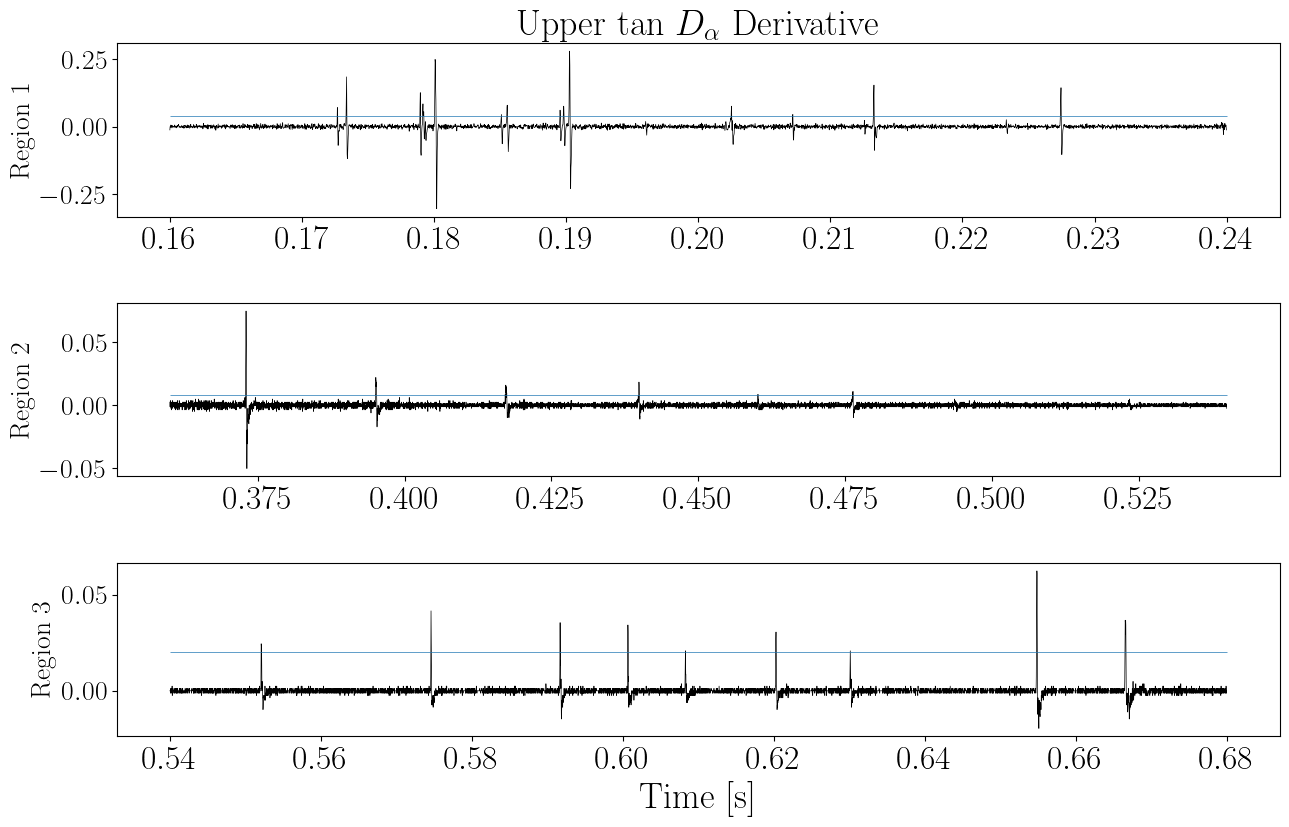

In [115]:
thresholds = [0.04, 0.008, 0.02]
timestep = np.mean(np.diff(utda_time))
idx_jump = int(0.0015//timestep)

figure, axes = plt.subplots(3, 1, sharex=False, figsize=(15, 9))

for i in range(3):
    idx1 = (np.abs(utda_time - regions[i][0])).argmin()
    idx2 = (np.abs(utda_time - regions[i][1])).argmin()
    grad = (utda_data[idx2]-utda_data[idx1])/(utda_time[idx2]-utda_time[idx1])
    shift = utda_data[idx1] + (utda_time[idx1:idx2]-utda_time[idx1])*grad
    
    #axes[i].plot(utda_time[idx1:idx2], utda_data[idx1:idx2]-shift, 'k', linewidth=0.8)
    axes[i].plot(utda_time[idx1:idx2], np.gradient(utda_data[idx1:idx2]), 'k', linewidth=0.5)
    axes[i].hlines(thresholds[i], utda_time[idx1], utda_time[idx2], linewidth=0.5)
    axes[i].tick_params(axis='x', labelsize=24)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].set_ylabel("Region " + str(i+1), fontsize=20)
    axes[i].locator_params(axis='y', nbins=3)

axes[-1].set_xlabel('Time [s]', fontsize=26)
axes[0].set_title(r"Upper tan $D_\alpha$ Derivative", fontsize=26)
plt.subplots_adjust(hspace=0.5)
#plt.savefig("Plots/Region densities/upper_tan_dalpha.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [131]:
for region in range(len(regions)):
    print("\nRegion", region)
    idx1 = (np.abs(utda_time - regions[region][0])).argmin()
    idx2 = (np.abs(utda_time - regions[region][1])).argmin()
    ddata = np.gradient(utda_data)
    
    check_idx = idx1
    windows = []
    while check_idx <= idx2:
        if ddata[check_idx] > thresholds[region]:
            windows.append([check_idx-idx_jump, check_idx+idx_jump])
            check_idx += idx_jump
        else:
            check_idx += 1
    
    crash_times = []
    for crash in windows:
        max_idx = crash[0] + np.where(ddata[crash[0]:crash[1]] == np.max(ddata[crash[0]:crash[1]]))[0][0]
        crash_times.append(utda_time[max_idx])


Region 0
0.17337999
0.18008
0.18553999
0.19026
0.20251998
0.20716
0.21329999
0.22745998

Region 1
0.37298
0.39508
0.41722
0.4399
0.46014
0.47634

Region 2
0.5521
0.5746
0.5917
0.60068
0.6083
0.6203
0.63014
0.65486
0.66656


Function to determine, based on upper tangential $D_\alpha$ data, times of the crashes

In [138]:
def get_crash_times(utda_time, utda_data, threshold, timeslice):
    timestep = np.mean(np.diff(utda_time))
    idx_jump = int(0.0015//timestep)
    idx1 = (np.abs(utda_time - timeslice[0])).argmin()
    idx2 = (np.abs(utda_time - timeslice[1])).argmin()
    ddata = np.gradient(utda_data)
    
    check_idx = idx1
    windows = []
    while check_idx <= idx2:
        if ddata[check_idx] > threshold:
            windows.append([check_idx-idx_jump, check_idx+idx_jump])
            check_idx += idx_jump
        else:
            check_idx += 1
    
    crash_times = []
    for crash in windows:
        max_idx = crash[0] + np.where(ddata[crash[0]:crash[1]] == np.max(ddata[crash[0]:crash[1]]))[0][0]
        crash_times.append(utda_time[max_idx])
    return crash_times

Function to work out window just before/after crash. Default is to return pre-crash but negative shifts give window just after.

In [147]:
def get_crash_adjacent_window(utda_time, utda_data, threshold, timeslice, start_shift=10e-3, end_shift = 1e-3):
    crash_times = get_crash_times(utda_time, utda_data, threshold, timeslice)
    windows = []
    for i in crash_times:
        windows.append([i-start_shift, i-end_shift])
    return windows

In [145]:
print(get_crash_times(utda_time, utda_data, thresholds[0], regions[0]))
get_crash_adjacent_window(utda_time, utda_data, thresholds[0], regions[0])

[0.17337999, 0.18008, 0.18553999, 0.19026, 0.20251998, 0.20716, 0.21329999, 0.22745998]


[[0.16337998747825622, 0.17237998747825622],
 [0.17007999658584594, 0.17907999658584595],
 [0.17553999066352843, 0.18453999066352844],
 [0.18025999307632445, 0.18925999307632446],
 [0.1925199830532074, 0.2015199830532074],
 [0.19715999603271483, 0.20615999603271484],
 [0.20329998970031737, 0.21229998970031738],
 [0.21745998203754424, 0.22645998203754425]]